# Week 3 - Movie Scores

This is the Week 3 notebook.

## Setup and Load Data

Import our standard modules:

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

Load the movie data, as we have in the other notebooks:

In [3]:
movies = pd.read_csv('hetrec2011-ml/movies.dat', delimiter='\t', encoding='latin1', na_values=['\\N'])
movies.head()

,id,title,imdbID,spanishTitle,imdbPictureURL,year,rtID,rtAllCriticsRating,rtAllCriticsNumReviews,rtAllCriticsNumFresh,...,rtAllCriticsScore,rtTopCriticsRating,rtTopCriticsNumReviews,rtTopCriticsNumFresh,rtTopCriticsNumRotten,rtTopCriticsScore,rtAudienceRating,rtAudienceNumRatings,rtAudienceScore,rtPictureURL
0,1,Toy story,114709,Toy story (juguetes),http://ia.media-imdb.com/images/M/MV5BMTMwNDU0...,1995,toy_story,9.0,73.0,73.0,...,100.0,8.5,17.0,17.0,0.0,100.0,3.7,102338.0,81.0,http://content7.flixster.com/movie/10/93/63/10...
1,2,Jumanji,113497,Jumanji,http://ia.media-imdb.com/images/M/MV5BMzM5NjE1...,1995,1068044-jumanji,5.6,28.0,13.0,...,46.0,5.8,5.0,2.0,3.0,40.0,3.2,44587.0,61.0,http://content8.flixster.com/movie/56/79/73/56...
2,3,Grumpy Old Men,107050,Dos viejos gruñones,http://ia.media-imdb.com/images/M/MV5BMTI5MTgy...,1993,grumpy_old_men,5.9,36.0,24.0,...,66.0,7.0,6.0,5.0,1.0,83.0,3.2,10489.0,66.0,http://content6.flixster.com/movie/25/60/25602...
3,4,Waiting to Exhale,114885,Esperando un respiro,http://ia.media-imdb.com/images/M/MV5BMTczMTMy...,1995,waiting_to_exhale,5.6,25.0,14.0,...,56.0,5.5,11.0,5.0,6.0,45.0,3.3,5666.0,79.0,http://content9.flixster.com/movie/10/94/17/10...
4,5,Father of the Bride Part II,113041,Vuelve el padre de la novia (Ahora también abu...,http://ia.media-imdb.com/images/M/MV5BMTg1NDc2...,1995,father_of_the_bride_part_ii,5.3,19.0,9.0,...,47.0,5.4,5.0,1.0,4.0,20.0,3.0,13761.0,64.0,http://content8.flixster.com/movie/25/54/25542...


In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10197 entries, 0 to 10196
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      10197 non-null  int64  
 1   title                   10197 non-null  object 
 2   imdbID                  10197 non-null  int64  
 3   spanishTitle            10197 non-null  object 
 4   imdbPictureURL          10016 non-null  object 
 5   year                    10197 non-null  int64  
 6   rtID                    9886 non-null   object 
 7   rtAllCriticsRating      9967 non-null   float64
 8   rtAllCriticsNumReviews  9967 non-null   float64
 9   rtAllCriticsNumFresh    9967 non-null   float64
 10  rtAllCriticsNumRotten   9967 non-null   float64
 11  rtAllCriticsScore       9967 non-null   float64
 12  rtTopCriticsRating      9967 non-null   float64
 13  rtTopCriticsNumReviews  9967 non-null   float64
 14  rtTopCriticsNumFresh    9967 non-null 

## Describing Distributions

Let's start by describing the distributions of the three score variables:

In [5]:
movies['rtAllCriticsScore'].describe()

count    9967.000000
mean       56.705127
std        32.784319
min         0.000000
25%        30.000000
50%        63.000000
75%        86.000000
max       100.000000
Name: rtAllCriticsScore, dtype: float64

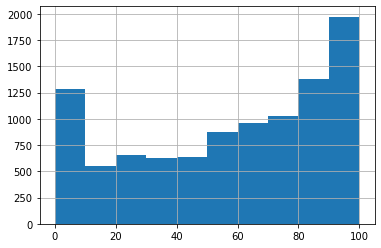

In [6]:
movies['rtAllCriticsScore'].hist()

The all-critics score has a left skew (visible in the histogram, and also because the mean is less than the median).  It further has spikes at around 0 and 1.  We discussed in class some causes of these spikes.

In [7]:
movies['rtTopCriticsScore'].describe()

count    9967.000000
mean       41.611518
std        38.773000
min         0.000000
25%         0.000000
50%        38.000000
75%        80.000000
max       100.000000
Name: rtTopCriticsScore, dtype: float64

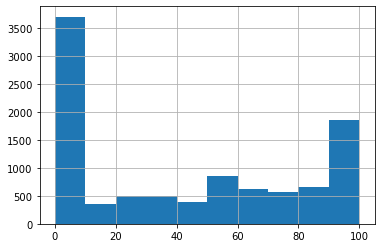

In [8]:
movies['rtTopCriticsScore'].hist()

The Top Critics score is similar, but much stronger spike at 0, and around 5.  We believe that 0 is probabaly used for 'missing' in a lot of cases.

In [9]:
movies['rtAudienceScore'].describe()

count    9967.000000
mean       48.340925
std        32.699404
min         0.000000
25%         0.000000
50%        57.000000
75%        76.000000
max       100.000000
Name: rtAudienceScore, dtype: float64

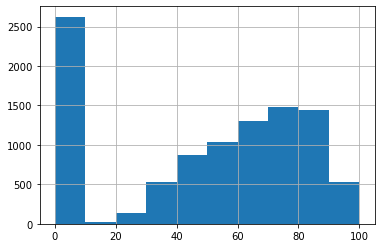

In [10]:
movies['rtAudienceScore'].hist()

The audience score doesn't have the spike at 1, but does have a large spike at 0 (again, missing data?).

## Relationships

To look at how one score relates to another, we want a scatterplot - it's our go-to for two numeric variables:

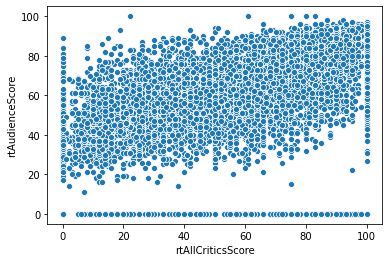

In [11]:
sns.scatterplot('rtAllCriticsScore', 'rtAudienceScore', data=movies)

Seaborn's `jointplot` is also useful here:

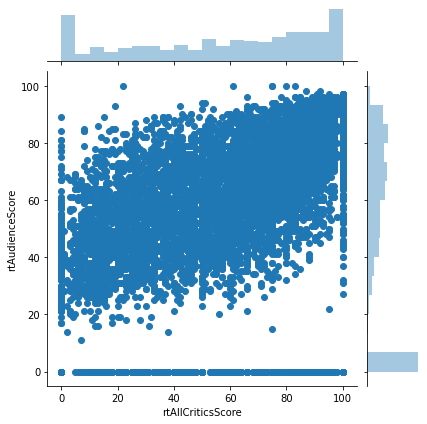

In [13]:
sns.jointplot('rtAllCriticsScore', 'rtAudienceScore', data=movies)

## Underrated

To look at *underrated* movies, we're going to look at the difference between the all-critics score and the audience score. If the critics underestimate the audience, that indicates it might be underrated.

Let's start by computing the difference:

In [12]:
movies['ac_diff'] = movies['rtAudienceScore'] - movies['rtAllCriticsScore']

Then the 5 movies with the largest difference (audience score much larger than critics score) are underrated:

In [13]:
movies.nlargest(5, 'ac_diff')

,id,title,imdbID,spanishTitle,imdbPictureURL,year,rtID,rtAllCriticsRating,rtAllCriticsNumReviews,rtAllCriticsNumFresh,...,rtTopCriticsRating,rtTopCriticsNumReviews,rtTopCriticsNumFresh,rtTopCriticsNumRotten,rtTopCriticsScore,rtAudienceRating,rtAudienceNumRatings,rtAudienceScore,rtPictureURL,ac_diff
7299,8007,Pure Country,105191,Pure Country,http://ia.media-imdb.com/images/M/MV5BMTI4OTQz...,1992,pure_country,0.0,4.0,0.0,...,0.0,1.0,0.0,1.0,0.0,3.9,3532.0,89.0,http://content8.flixster.com/movie/10/93/85/10...,89.0
4141,4442,The Last Dragon,89461,El último dragón,http://ia.media-imdb.com/images/M/MV5BMTU5Nzc5...,1985,the-last-dragon,0.0,4.0,0.0,...,0.0,1.0,0.0,1.0,0.0,3.9,4398.0,84.0,http://content7.flixster.com/movie/11/12/45/11...,84.0
4960,5281,The Wrong Guy,120536,The Wrong Guy,http://ia.media-imdb.com/images/M/MV5BMTI4MzM1...,1997,wrong_guy,0.0,3.0,0.0,...,0.0,1.0,0.0,1.0,0.0,3.6,826.0,81.0,http://content7.flixster.com/movie/10/92/04/10...,81.0
5331,5662,The Wrong Guy,120536,The Wrong Guy,http://ia.media-imdb.com/images/M/MV5BMTI4MzM1...,1997,wrong_guy,0.0,3.0,0.0,...,0.0,1.0,0.0,1.0,0.0,3.6,826.0,81.0,http://content7.flixster.com/movie/10/92/04/10...,81.0
6799,7192,Only the Strong,107750,Sólo el más fuerte,http://ia.media-imdb.com/images/M/MV5BMTY3MDQx...,1993,only_the_strong,2.8,7.0,0.0,...,2.5,5.0,0.0,5.0,0.0,3.7,1259.0,79.0,http://content9.flixster.com/movie/10/86/99/10...,79.0


The lowest scores are overrated:

In [14]:
movies.nsmallest(5, 'ac_diff')

,id,title,imdbID,spanishTitle,imdbPictureURL,year,rtID,rtAllCriticsRating,rtAllCriticsNumReviews,rtAllCriticsNumFresh,...,rtTopCriticsRating,rtTopCriticsNumReviews,rtTopCriticsNumFresh,rtTopCriticsNumRotten,rtTopCriticsScore,rtAudienceRating,rtAudienceNumRatings,rtAudienceScore,rtPictureURL,ac_diff
57,59,Le confessionnal,112714,Le confessionnal,http://ia.media-imdb.com/images/M/MV5BMTk2MDE1...,1995,confessional,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,http://images.rottentomatoescdn.com/images/def...,-100.0
180,189,The Reckless Moment,41786,Almas desnudas,http://ia.media-imdb.com/images/M/MV5BMTUyNzEx...,1949,reckless_moment,0.0,3.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,http://content6.flixster.com/movie/55/32/82/55...,-100.0
287,298,Tui shou,105652,Tui shou,http://ia.media-imdb.com/images/M/MV5BMTIxMzk0...,1992,pushing_hands,0.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,http://content8.flixster.com/movie/10/84/00/10...,-100.0
526,545,Harem suaré,179841,El último harén,http://ia.media-imdb.com/images/M/MV5BMjcwNjYx...,1999,1121056-harem,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,http://content9.flixster.com/movie/27/77/27770...,-100.0
589,615,Pane e cioccolata,70506,Aventuras y desventuras de un italiano emigrado,http://ia.media-imdb.com/images/M/MV5BMTQ5NjM5...,1973,bread_and_chocolate,0.0,4.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,http://content7.flixster.com/movie/10/89/25/10...,-100.0


Our missing data is going to be a problem here, though. We need to clean up a lot of thes 0s in order to have reliable results. I'll leave that to you!